### Notebook purpose

Examine the correlation between various parameters for different alloys.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from common_util import LogLinearArrhenius,LogLinearArrheniusModelFunc, setup_axis_default
import math
import pickle
from typing import Callable
from scipy.integrate import quad
from scipy.optimize import bisect
from scipy.integrate import solve_ivp
from matplotlib import rc

rc('font',**{'family':'serif','serif':['Times New Roman'],'weight': 'bold'})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = "".join([r"\usepackage{newtxtext,newtxmath}",r"\boldmath"])

def get_arrhenius_process_params(ap: LogLinearArrhenius) -> np.ndarray:
    return ap.params[0],ap.params[1]

def get_model_ap_params(model: LogLinearArrheniusModelFunc) -> np.ndarray:
    return (*get_arrhenius_process_params(model.ap1),*get_arrhenius_process_params(model.ap2))

def get_model_params(model: LogLinearArrheniusModelFunc) -> np.ndarray:
    return *get_model_ap_params(model),model.n



0.024579135230474863
0.05810533139944276
0.26645787019143374
0.45365747824797625
       a_1    B_1    a_2    B_2    \nu
a_1  1.000 -0.995  0.824 -0.815 -0.166
B_1 -0.995  1.000 -0.802  0.780  0.072
a_2  0.824 -0.802  1.000 -0.991 -0.114
B_2 -0.815  0.780 -0.991  1.000  0.245
\nu -0.166  0.072 -0.114  0.245  1.000


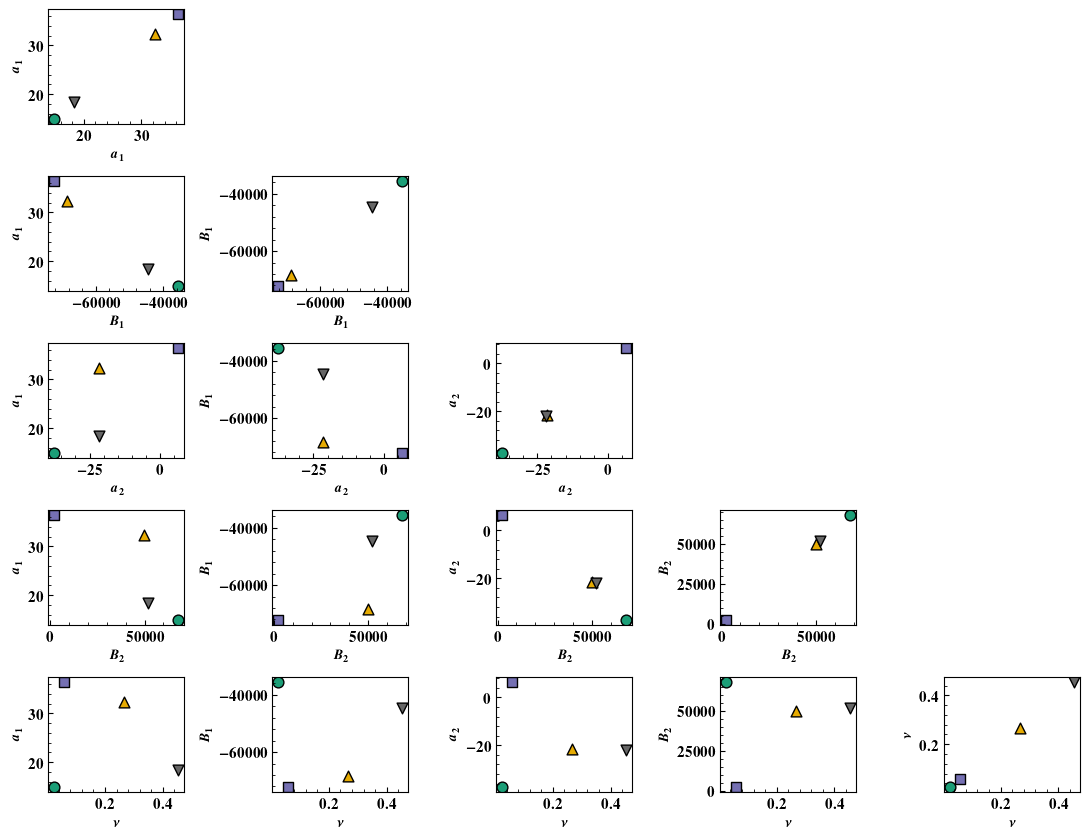

In [38]:
import pandas as pd

model_name = 'Generalized Logistic_{}'
data_names = ['alfonso_data_hr',
              'alfonso_data_mr',
              'richou_batch_a', 
              'richou_batch_b']
"""
data_names  = ['Lopez et al. (2015) - HR',
               'Lopez et al. (2015) - MR',
               'Richou et al. (2020) - Batch A',
               'Richou et al. (2020) - Batch B']

"""

symbols = np.array(['o','s','^','v'])
colors = plt.get_cmap('Dark2')(np.linspace(0,1,len(data_names)))
ylabels = [r'$a_1$',r'$B_1$',r'$a_2$',r'$B_2$',r'$\nu$']

params = []
for data_name in data_names:
    with open(f'.model/{model_name.format(data_name)}_weighted.pkl','rb') as f:
        model = pickle.load(f)  
    
    a1,B1,a2,B2,nu = get_model_params(model)
    print(nu)
    A1,A2 = math.exp(a1),math.exp(a2)
    params.append(np.array([[a1,B1,a2,B2,nu]]))
    #inf_params = pd.read_csv(f'.inference/{model_name.format(data_name)}_params.csv')
    #params.append(inf_params['mean'].to_numpy()[np.newaxis,:])

params = np.concatenate(params,axis = 0)

fig,axes = plt.subplots(nrows = params.shape[1],
                      ncols = params.shape[1],
                      figsize = (11,8.5))


for i in range(params.shape[1]):
    for j in range(i+1):
        for k in range(len(data_names)):
            axes[i,j].scatter(params[k,i],params[k,j],color = colors[k],marker = symbols[k],s = 60,
                              edgecolor = 'k')

        axes[i,j].set_xlabel(ylabels[i])
        axes[i,j].set_ylabel(ylabels[j])
        setup_axis_default(axes[i,j])

    for j in range(i+1,params.shape[1]):
        axes[i,j].axis('off')

fig.tight_layout()

index_labels = [ylab[1:-1] for ylab in ylabels]
corr = pd.DataFrame(np.corrcoef(params,rowvar = False),
                    columns = index_labels,
                    index = index_labels)

print(np.round(corr,3))